In [1]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
#Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

### Preprocessing Environment

In [3]:
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt

In [4]:
# Base Environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# Grayscale environment
env = GrayScaleObservation(env, keep_dim=True)
# Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# Stack Frames
env = VecFrameStack(env, 4, channels_order='last')

In [5]:
state = env.reset()
state.shape

(1, 240, 256, 4)

In [6]:
state, reward, done, info = env.step([env.action_space.sample()])

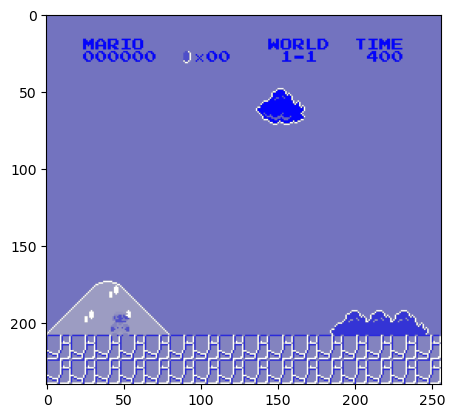

In [7]:
plt.imshow(state[0])

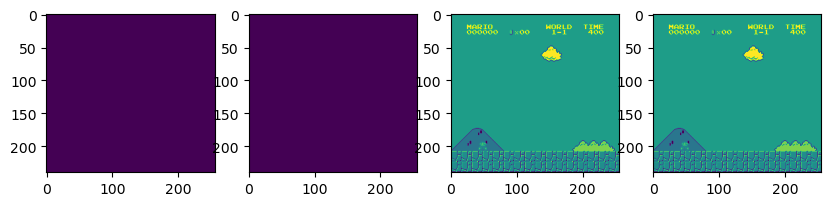

In [8]:
plt.figure(figsize=(10,8))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

### TRAIN RL MODEL

In [9]:
import os
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

In [11]:
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _int_callback(self):
        if self.save_path is not None:
            os.makedirs(self,save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [12]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [13]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [14]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR,
             learning_rate=0.0000001, n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


In [15]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=5000000, callback=callback)

Logging to ./logs/PPO_3


c:\Users\alecs_p32arfy\anaconda3\envs\gpu\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 30  |
|    iterations      | 1   |
|    time_elapsed    | 16  |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 31            |
|    iterations           | 2             |
|    time_elapsed         | 32            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 1.4109537e-07 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.00235      |
|    learning_rate        | 1e-07         |
|    loss                 | 185           |
|    n_updates            | 10            |
|    policy_gradient_loss | -1.61e-05     |
|    value_loss           | 429           |
-------------------------------------------
-----

In [102]:
model.save('learningstates')

In [10]:
# Load model
model = PPO.load('./train/best_model_5000000')

In [11]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

c:\Users\alecs_p32arfy\anaconda3\envs\gpu\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
c:\Users\alecs_p32arfy\anaconda3\envs\gpu\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
